In [5]:
import importlib
from matplotlib import pyplot as plt 


import calibration_metric
from calibration_metric.vis.calibration_plot import plot_df, get_df_from_file
from calibration_metric.utils.reader import MisoTopLogitFormatSequenceReader
importlib.reload(calibration_metric)

spider_paths_and_models = [("/brtx/604-nvme2/estengel/calflow_calibration/benchclamp/1.0/t5-small-lm-adapt_spider_past_none_db_val_all_0.0001/checkpoint-10000//outputs/test_all.logits",
                            "T5-small"),
                            ("/brtx/604-nvme2/estengel/calflow_calibration/benchclamp/1.0/t5-base-lm-adapt_spider_past_none_db_val_all_0.0001/checkpoint-10000//outputs/test_all.logits",
                            "T5-base"),
                            ("/brtx/604-nvme2/estengel/calflow_calibration/benchclamp/1.0/t5-large-lm-adapt_spider_past_none_db_val_all_0.0001/checkpoint-10000/outputs/test_all.logits", 
                             "T5-large"),
                            ("/brtx/604-nvme2/estengel/calflow_calibration/benchclamp/1.0/bart-base_spider_past_none_db_val_all_0.0001/checkpoint-5000/outputs/test_all.logits",
                            "BART-base"),
                            ("/brtx/604-nvme2/estengel/calflow_calibration/benchclamp/1.0/bart-large_spider_past_none_db_val_all_0.0001/checkpoint-5000/outputs/test_all.logits",
                            "BART-large"),
                            ("/brtx/604-nvme2/estengel/calflow_calibration/benchclamp/1.0/codet5-base_spider_past_none_db_val_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "Code-T5-base")]


cosql_paths_and_models = [("/brtx/604-nvme2/estengel/calflow_calibration/benchclamp/1.0/t5-small-lm-adapt_cosql_past_all_db_val_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "T5-small"),
                            ("/brtx/604-nvme2/estengel/calflow_calibration/benchclamp/1.0/t5-base-lm-adapt_cosql_past_all_db_val_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "T5-base"),
                            ("/brtx/604-nvme2/estengel/calflow_calibration/benchclamp/1.0/t5-large-lm-adapt_cosql_past_all_db_val_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "T5-large"),
                            ("/brtx/604-nvme2/estengel/calflow_calibration/benchclamp/1.0/bart-base_cosql_past_all_db_val_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "BART-base"),
                            ("/brtx/604-nvme2/estengel/calflow_calibration/benchclamp/1.0/bart-large_cosql_past_all_db_val_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "BART-large"),
                            ("/brtx/604-nvme2/estengel/calflow_calibration/benchclamp/1.0/codet5-base_cosql_past_all_db_val_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "Code-T5-base")]

all_dfs = {"spider": {}, "cosql": {}}

print("get spider dfs")
for path, name in spider_paths_and_models:
    try:
        # df, ece = get_df_from_file(path, n_bins=10) 
        df, ece = get_df_from_file(path, n_bins=10, binning_strategy="adaptive", ignore_tokens=['"', "'"])
        all_dfs['spider'][name] = (df, ece)
    except FileNotFoundError:
        print(f"missing: {name}")
        continue
print("get tree_dst dfs")
for path, name in cosql_paths_and_models:
    try:
        print(name)
        # df, ece = get_df_from_file(path,  n_bins=10)
        df, ece = get_df_from_file(path,  n_bins=10, binning_strategy="adaptive", ignore_tokens=['"', "'"])
        all_dfs['cosql'][name] = (df, ece)
    except FileNotFoundError:
        print(f"missing: {name}")
        continue



get spider dfs
get tree_dst dfs
T5-small
T5-base
T5-large
BART-base
BART-large
Code-T5-base


In [6]:
all_dfs['spider']['T5-small'][0]['count'].sum()

45976

Text(0.5, -0.01, 'Token Accuracy')

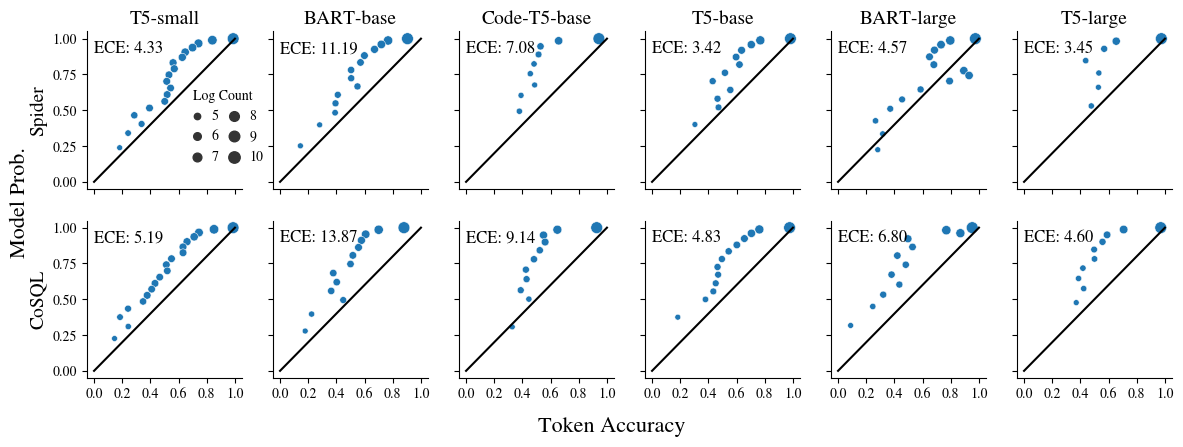

In [7]:
from matplotlib import pyplot as plt 

plt.rcParams["font.family"] = "Nimbus Roman"
import pandas as pd 

importlib.reload(calibration_metric)
from calibration_metric.vis.calibration_plot import plot_df, get_df_from_file

import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

fig, axes = plt.subplots(2, 6, figsize=(14, 4.5), sharex=True, sharey=True)


order = ["T5-small", "BART-base", "Code-T5-base", "T5-base", "BART-large", "T5-large" ]
# with open("calibration_results/metrics.csv") as f:
#     metric_df = pd.read_csv(f)

metric_kwargs = {"x": 0.000, "y": 0.9, "fontsize": 12, "horizontalalignment": "left"}
em_kwargs = {"x": 0.50, "y": 0.0, "fontsize": 12, "horizontalalignment": "left"}

# TODO (elias): add EM to plots 

for i, model in enumerate(order):
    try:
        cf_df_to_plot, ece = all_dfs['spider'][model]
        plot_df(cf_df_to_plot, 
                ax=axes[0, i], 
                title=model, 
                show_legend=False, 
                metric_value=ece, 
                metric_value_kwargs=metric_kwargs,
                xlabel=None,
                ylabel="Spider")
        # em_value = metric_df[metric_df['Model'].str.startswith(model)][metric_df['Dataset'] == "CalflowV2"]['EM'].values[0]
        # axes[0,i].text(s=f"EM: {em_value:.2f}", **em_kwargs)
        axes[0,0].set_ylabel("Spider", fontsize=14)
        axes[0,i].set_title(model, fontsize=14)
        axes[0,i].set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    except KeyError:
        print(f"skip : {model}")
        pass
    try:
        td_df_to_plot, ece = all_dfs['cosql'][model]
        plot_df(td_df_to_plot, 
                ax=axes[1, i], 
                title=None, 
                show_legend=False, 
                metric_value=ece, 
                 metric_value_kwargs=metric_kwargs,
                 xlabel=None,
                 ylabel="CoSQL") 
        # em_value = metric_df[metric_df['Model'].str.startswith(model)][metric_df['Dataset'] == "TreeDST"]['EM'].values[0]
        axes[1,0].set_ylabel("CoSQL", fontsize=14)
        # axes[1,i].text(s=f"EM: {em_value:.2f}", **em_kwargs)
        axes[1,i].set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])

    except KeyError:
        pass

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, title="Log Count", frameon=False, bbox_to_anchor=(0.26, 0.78), handletextpad=0.1, columnspacing=0.1)

fig.text(0.07, 0.5, "Model Prob.", va='center', rotation='vertical', fontsize=16)
fig.text(0.5, -0.01, "Token Accuracy", ha='center', fontsize=16)
# fig.tight_layout()

# plt.savefig("/home/estengel/papers/did-you-mean-2022/figures/sql_all_models_calibration_plot.pdf", bbox_inches='tight')

In [17]:
from calibration_metric import ECEMetric
from calibration_metric.utils.reader import TopLogitFormatSequenceReader
metric = ECEMetric(n_bins = 20, weighted=False, return_df=True)

# reader = TopLogitFormatSequenceReader("/brtx/604-nvme2/estengel/calflow_calibration/benchclamp/1.0/t5-base-lm-adapt_spider_past_none_db_val_all_0.0001/checkpoint-10000//outputs/test_all.logits", ignore_tokens=None)
reader = TopLogitFormatSequenceReader("/brtx/604-nvme2/estengel/calflow_calibration/benchclamp/1.0/t5-small-lm-adapt_spider_past_none_db_val_all_0.0001/checkpoint-10000//outputs/test_all.logits", ignore_tokens=None)
top_preds, is_correct = reader.read()
ece, df = metric(top_preds, is_correct) 
ece *= 100

print(ece)

13.40140718172925


In [12]:
spider_paths_and_models['spider']['Code-T5-base']


TypeError: list indices must be integers or slices, not str

## Is the poor calibration due just to low data size? 
We see very poor calibration for SQL but it also has much less data (~8k instead of ~100k for SMCalflow). What if we train SMCalflow on a similar amount of data? 

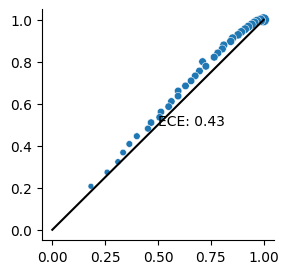

In [5]:
from calibration_metric.vis.calibration_plot import get_df_from_file, plot_df
from matplotlib import pyplot as plt

t5_small_calflow_path = "/brtx/604-nvme2/estengel/calflow_calibration/benchclamp/1.0/t5-small-lm-adapt_calflow_last_user_7794_0.0001/checkpoint-10000/outputs/test_all.logits"

df, ece = get_df_from_file(t5_small_calflow_path, n_bins=10, binning_strategy="adaptive") 
fig, ax = plt.subplots(1,1, figsize=(3,3))

plot_df(df, 
        ax=ax,
        title=None, 
        metric_value=ece, 
        xlabel=None,
        ylabel=None) 


## Calflow model is calibrated even at low data 